In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE

url = "https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/data.csv"
df = pd.read_csv(url)


#Clean column names
df.columns = df.columns.str.strip()

#Separate features and target
X = df.drop(columns=['num'])
y = df['num'].astype(int)  # ensure numeric target

#Handle missing/non-numeric values
X = X.replace('?', pd.NA)               # replace '?' with NaN
X = X.apply(pd.to_numeric)              # convert to numeric
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Check class distribution
print("Class distribution before SMOTE:", Counter(y))

#Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)  # <-- fixed here
print("Class distribution after SMOTE:", Counter(y_res))

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Class distribution before SMOTE: Counter({0: 188, 1: 106})
Class distribution after SMOTE: Counter({0: 188, 1: 188})
Train shape: (300, 13)
Test shape: (76, 13)


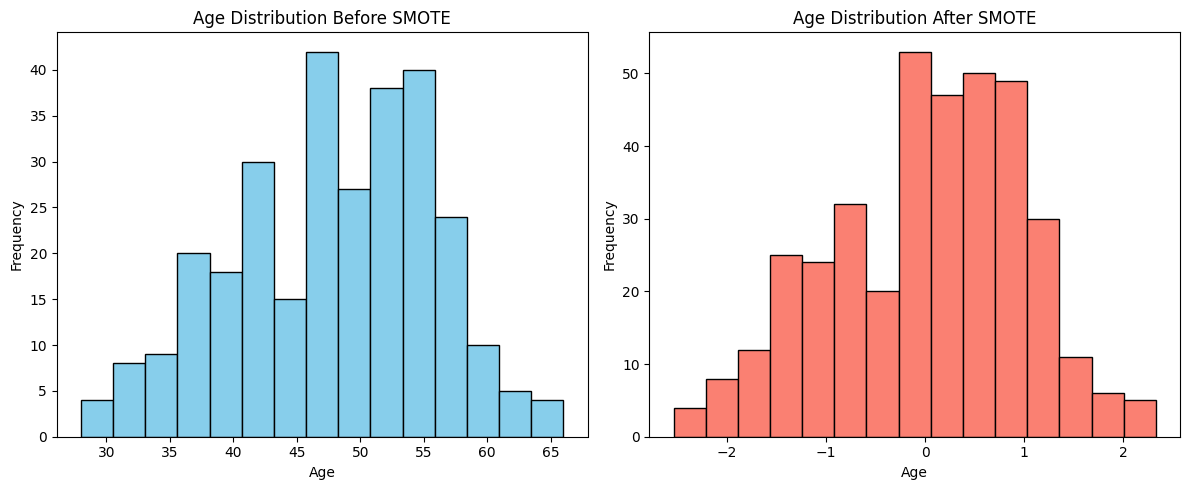

In [12]:
#EDA

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Plot histogram for 'age'
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Before SMOTE
ax[0].hist(X['age'], bins=15, color='skyblue', edgecolor='black')
ax[0].set_title('Age Distribution Before SMOTE')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# After SMOTE
ax[1].hist(X_res['age'], bins=15, color='salmon', edgecolor='black')
ax[1].set_title('Age Distribution After SMOTE')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


